**목적: 쇼핑몰 사이트의 상품 주문 수 추세를 분석하여 판매량 개선 방향성 도출**

**정보**   
- 주요 품목: 컴퓨터
- 데이터 설명
    1. customer_master.csv
        - 고객 데이터
        - 이름, 성별 등
    2. item_master.csv
        - 취급 상품 데이터
        - 상품명, 가격 등
    3. transaction_1.csv, transaction_2.csv
        - 구매내역 데이터 (분할되어 있음)
        - 고객id, 구매 시점, 구매 금액 등
    4. transaction_detail_1.csv, transaction_detail_2.csv
        - 구매내역 상세 데이터 (분할되어 있음)
        - 상품id, 구입 개수 등

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#data-load" data-toc-modified-id="data-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>data load</a></span></li><li><span><a href="#데이터-가공" data-toc-modified-id="데이터-가공-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 가공</a></span><ul class="toc-item"><li><span><a href="#분할-데이터-세로-결합" data-toc-modified-id="분할-데이터-세로-결합-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>분할 데이터 세로 결합</a></span></li><li><span><a href="#detail-data-기준으로-다른-data-결합" data-toc-modified-id="detail-data-기준으로-다른-data-결합-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>detail data 기준으로 다른 data 결합</a></span></li><li><span><a href="#컬럼-생성" data-toc-modified-id="컬럼-생성-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>컬럼 생성</a></span></li><li><span><a href="#생성-데이터-검산" data-toc-modified-id="생성-데이터-검산-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>생성 데이터 검산</a></span></li></ul></li><li><span><a href="#기초통계량-파악" data-toc-modified-id="기초통계량-파악-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>기초통계량 파악</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#월별-매출합" data-toc-modified-id="월별-매출합-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>월별 매출합</a></span></li><li><span><a href="#월별-상품별-개수,매출-합" data-toc-modified-id="월별-상품별-개수,매출-합-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>월별 상품별 개수,매출 합</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# data load

In [2]:
customer_master = pd.read_csv('data_code/1장/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
item_master = pd.read_csv('data_code/1장/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('data_code/1장/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
transaction_2 = pd.read_csv('data_code/1장/transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [6]:
transaction_detail_1 = pd.read_csv('data_code/1장/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [7]:
transaction_detail_2 = pd.read_csv('data_code/1장/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


# 데이터 가공

## 분할 데이터 세로 결합

In [8]:
# transaction data
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [9]:
transaction.shape

(6786, 4)

In [10]:
len(transaction_1) + len(transaction_2)

6786

In [11]:
# transaction_detail data
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [12]:
transaction_detail.shape

(7144, 4)

In [13]:
len(transaction_detail_1) + len(transaction_detail_2)

7144

## detail data 기준으로 다른 data 결합
- 가장 상세한 데이터인 transaction_detail 기준

In [14]:
# transaction_detail + transaction
join_data = pd.merge(transaction_detail, transaction[['transaction_id','payment_date','customer_id']], on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [15]:
join_data.shape

(7144, 6)

In [16]:
len(transaction_detail), len(transaction)

(7144, 6786)

In [17]:
# (join_data + item_master) + customer_master
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [18]:
join_data.shape

(7144, 15)

In [19]:
len(customer_master), len(item_master)

(5000, 5)

## 컬럼 생성

In [20]:
# 매출
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity','item_price','price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## 생성 데이터 검산

In [21]:
# transaction의 price 컬럼과 비교하여 간단한 검산 진행
join_data['price'].sum() == transaction['price'].sum()

True

# 기초통계량 파악
- 결측치 개수
- 전체 대비 수치
    - ex. 상품 A 매출 10만원 (전체 매출 단위가 10억 or 100만원 인지에 따라 의미가 달라짐)

In [22]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
price                0
dtype: int64

In [23]:
join_data.describe()

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [24]:
join_data['payment_date'].min(), join_data['payment_date'].max()

('2019-02-01 01:36:57', '2019-07-31 23:41:38')

# EDA

## 월별 매출합

In [25]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
item_name            object
item_price            int64
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
price                 int64
dtype: object

In [26]:
# datatime type 변환, 연월 추출
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date','payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [27]:
# 월별 매출 합계 계산
join_data.groupby(['payment_month'])[['price']].sum()

,price
payment_month,
201902,160185000
201903,160370000
201904,160510000
201905,155420000
201906,164030000
201907,170620000


- 5월에 매출이 감소했지만, 6월과 7월에 회복함
- 반년동안 가장 매출이 높은 달은 7월
- 한 달에 약 1억 6천만원 정도의 매출 -> 연간 20억원 정도의 매출이 예상됨

## 월별 상품별 개수,매출 합

In [28]:
join_data.groupby(['payment_month','item_name'])[['quantity','price']].sum()

quantity     price
payment_month item_name                    
201902        PC-A            483  24150000
              PC-B            297  25245000
              PC-C            165  19800000
              PC-D            173  31140000
              PC-E            285  59850000
201903        PC-A            520  26000000
              PC-B            300  25500000
              PC-C            159  19080000
              PC-D            143  25740000
              PC-E            305  64050000
201904        PC-A            518  25900000
              PC-B            276  23460000
              PC-C            183  21960000
              PC-D            135  24300000
              PC-E            309  64890000
201905        PC-A            497  24850000
              PC-B            298  25330000
              PC-C            171  20520000
              PC-D            144  25920000
              PC-E            280  58800000
201906        PC-A            520  26000000
              PC-B            282  23970000
              PC-C            182  21840000
              PC-D            160  28800000
              PC-E            302  63420000
201907        PC-A            505  25250000
              PC-B            332  28220000
              PC-C            162  19440000
              PC-D            145  26100000
              PC-E            341  71610000

- 직관적 이해 조금 어려움 -> pivot table로 다시 집계

In [29]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price','quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

- 매출 합계는 PC-E(가장 비싼 모델)가 가장 높지만, 개수는 PC-A(가장 싼 모델)가 가장 많음
- 앞서 살펴본 월별 추세에 5월 매출이 감소하는 경향을 보임
    - 5월에 PC-B, PC-D 매출이 증가했지만, 큰 매출을 차지하는 PC-E의 매출이 많이 감소한 것이 영향을 미친 것 같음
- 6,7월에 매출이 회복하는 경향을 보였었음
    - 6,7월 PC-E의 매출이 크게 상승한 영향을 받은 것 같음

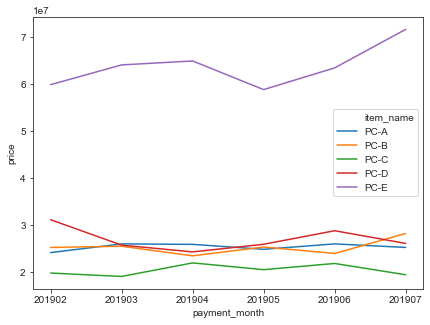

In [30]:
# 월별 상품별 매출합 시각화
graph_data = join_data.groupby(['payment_month','item_name'])[['price']].sum().reset_index()

plt.figure(figsize=(7,5))
sns.set_style('ticks')
sns.lineplot(data=graph_data, x='payment_month', y='price', hue='item_name')

- PC-E가 매출을 견인하는 주요 모델임